In [169]:
import environ

env = environ.Env()
environ.Env.read_env()
DataSetsPath     = env('DataSetsPath') #*
ModelsPath       = env('ModelsPath') #*
FitFunctionsPath = env('FitFunctionsPath') #*

In [170]:
import sys
sys.path.append(DataSetsPath)
sys.path.append(ModelsPath)
sys.path.append(FitFunctionsPath)

In [171]:
import torch
import torchvision.transforms as transforms
from DataSets.dataSetCatsVsDogs import DataSet_Img_To_Label

In [172]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [173]:

resize_image = transforms.Compose([
                        #* Compose = compoues a list of function
                        transforms.ToPILImage(),
                        transforms.Resize((250, 250)),
                        #* ToPILImage = cahnge the data type from PyTorch tensor or a NumPy ndarray to : A PIL (Python Imaging Library)
                        transforms.ToTensor(), 
                        #* change the data type from Numpy or PIL to tensor
                        ])

root_Data     = "C:/Users/karlo/OneDrive/Documentos/DataSets/dogs-vs-cats/train/train"
root_Data_Val = "C:/Users/karlo/OneDrive/Documentos/DataSets/dogs-vs-cats/test1/test1"
myDataSet     = DataSet_Img_To_Label(root_Data, resize_image, test = False, dataSize = 1000)
myDataSetTest = DataSet_Img_To_Label(root_Data, resize_image, test = False)
myDataSetValy = DataSet_Img_To_Label(root_Data_Val, resize_image, test = False, dataSize = 1000)

print("myDataSet     = ", myDataSet)
print("myDataSetTest = ", myDataSetTest)
print("myDataSetTest = ", myDataSetValy)

images.size() =  25000
images.size() =  25000
images.size() =  12500
myDataSet     =  len(dataSet) =  25000
dataSet[0]   =  ('cat.0.jpg', 1)

myDataSetTest =  len(dataSet) =  25000
dataSet[0]   =  ('cat.0.jpg', 1)

myDataSetTest =  len(dataSet) =  12500
dataSet[0]   =  ('1.jpg', '0')



In [174]:
from torch.utils.data import DataLoader
from torch.utils.data import DataLoader, RandomSampler

random_sampler = RandomSampler(myDataSet)
batch_size = 8
my_Data_Loader      = DataLoader(myDataSet    , batch_size = batch_size, num_workers = 0, sampler = random_sampler)
my_Data_Loader_test = DataLoader(myDataSetTest, batch_size = 4, num_workers = 0, sampler = random_sampler)
my_Data_Loader_Val  = DataLoader(myDataSetValy, batch_size = 8, num_workers = 0, sampler = random_sampler)

In [175]:
from Models.modelCatsVsDogs import modelCNN
# from DataSets.dataSetCatsVsDogs import DataSet_Img_To_Label

myModel = modelCNN()
# myModel.cuda()

In [182]:

#* test train_modelCNN
from FitFunctions.fitFunctionsForCatsVsDogs import train_modelCNN
import torch.nn as nn
from torch import optim

opt_model = optim.Adam(myModel.parameters(),  lr = 3e-3, betas = (0.9, 0.999))
# criterion = nn.BCELoss()
# criterion = torch.nn.MSELoss()
criterion = nn.CrossEntropyLoss()
getValLoos = True
history = train_modelCNN(my_Data_Loader, myModel, opt_model, device = device, num_epochs = 5, get_History = True, getValLoos = getValLoos, data_loader_Val = my_Data_Loader)
# history = train_model(myModel, my_Data_Loader, criterion, opt_model, device = device, num_epochs = 1)


Epoch =  0
Batch [2500/25000], Loss: = 0.2449
Epoch completed, Average Test Loss: 0.2500
Epoch completed, Average Loss: 0.2503
Epoch =  1
Batch [2500/25000], Loss: = 0.2476
Epoch completed, Average Test Loss: 0.2503
Epoch completed, Average Loss: 0.2503
Epoch =  2
Batch [2500/25000], Loss: = 0.2499
Epoch completed, Average Test Loss: 0.2509
Epoch completed, Average Loss: 0.2503
Epoch =  3
Batch [2500/25000], Loss: = 0.2649
Epoch completed, Average Test Loss: 0.2500
Epoch completed, Average Loss: 0.2503
Epoch =  4
Batch [2500/25000], Loss: = 0.2500
Epoch completed, Average Test Loss: 0.2504
Epoch completed, Average Loss: 0.2503


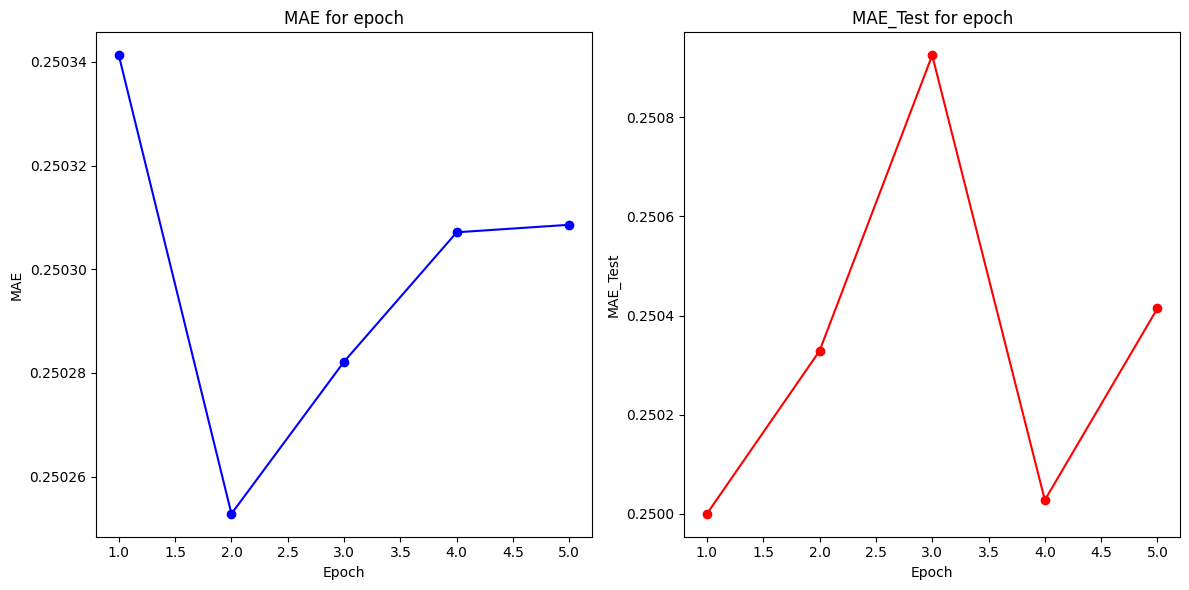

In [183]:
import matplotlib.pyplot as plt

Epochs_values     = range(1, len(history['MAE']) + 1)
Epochs_values_Val = range(1, len(history['MAE']) + 1)

# Create two subplots (one for MAE and one for MAE_Test) in a single row
fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot MAE in the first subplot
plt1.plot(Epochs_values, history['MAE'], marker='o', color='blue')
plt1.set_xlabel('Epoch')
plt1.set_ylabel('MAE')
plt1.set_title('MAE for epoch')

# Plot MAE_Test in the second subplot
plt2.plot(Epochs_values_Val, history['MAE_Test'], marker='o', color='red')
plt2.set_xlabel('Epoch')
plt2.set_ylabel('MAE_Test')
plt2.set_title('MAE_Test for epoch')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



In [184]:
import numpy as np
import os
from PIL import Image

img_pth = "C:/Users/karlo/OneDrive/Documentos/DataSets/dogs-vs-cats/train/train/"

dog_paths = ['dog.170.jpg', 'dog.171.jpg', 'dog.172.jpg', 'dog.173.jpg', 'dog.174.jpg', 'dog.175.jpg', 'dog.176.jpg',
             'dog.177.jpg', 'dog.178.jpg', 'dog.179.jpg']

cat_paths = ['cat.170.jpg', 'cat.171.jpg', 'cat.172.jpg', 'cat.173.jpg', 'cat.174.jpg', 'cat.175.jpg', 'cat.176.jpg',
             'cat.177.jpg', 'cat.178.jpg', 'cat.179.jpg']

def getArrayBatch(paths):

    tensor_batch = []
    for path in paths:
        img  = os.path.join(img_pth + path)
        img  = np.array(Image.open(img))
        img  = img [:, :, :3]
        img = resize_image(img)
        tensor_batch.append(img)
    
    tensor_batch = myModel(torch.stack(tensor_batch))
    tensor_batch = tensor_batch.detach().numpy()
    return tensor_batch

predict_Array_dogs = getArrayBatch(dog_paths)
predict_Array_cats = getArrayBatch(cat_paths)



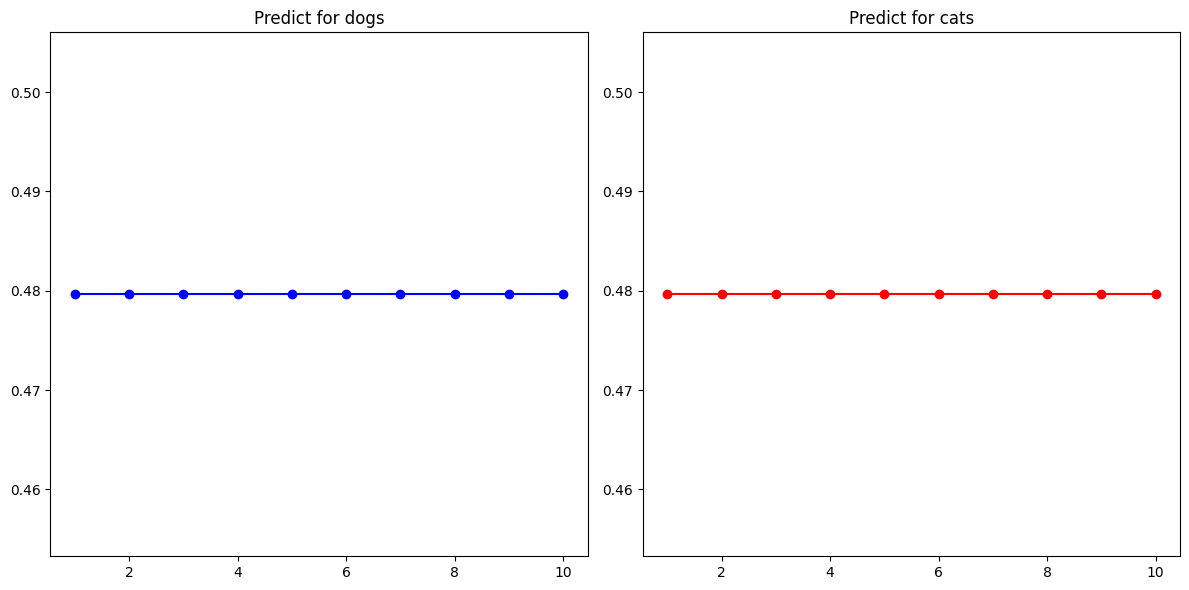

In [185]:
import matplotlib.pyplot as plt

num_images_dogs     = range(1, len(predict_Array_dogs) + 1)
num_images_cats = range(1, len(predict_Array_dogs) + 1)

fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(12, 6))

plt1.plot(num_images_dogs, predict_Array_dogs, marker='o', color='blue')
plt1.set_title('Predict for dogs')
plt2.plot(num_images_cats, predict_Array_cats, marker='o', color='red')
plt2.set_title('Predict for cats')

plt.tight_layout()
plt.show()


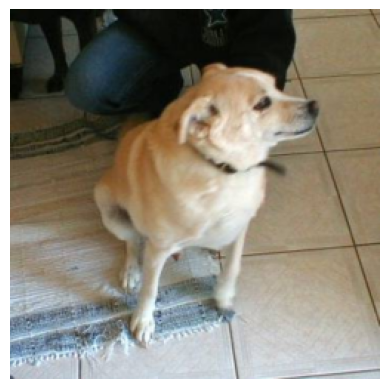

tensor(0.4796, grad_fn=<SelectBackward0>)

In [186]:
# TODO use the model 

img_pth = "C:/Users/karlo/OneDrive/Documentos/DataSets/dogs-vs-cats/train/train/dog.171.jpg"

img  = os.path.join(img_pth)
img  = np.array(Image.open(img))
img  = img [:, :, :3]
img = resize_image(img)


img_array = img.permute(1, 2, 0).numpy()  # Assuming the tensor is of shape [3, height, width]
# Plot the image
img = img.unsqueeze(0)
plt.imshow(img_array)
plt.axis('off')  # Turn off axis
plt.show()

myModel(img)[0][0]